In [1]:
cd ../src

/home/richard/Desktop/software/upload/epicluster-results/src


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
all_results = []
kappas = [100, 10, 1, 0.5]

for kappa in kappas:

    # serial interval
    serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
    w = serial_interval['w']
    w = w[:20]
    w = w / sum(w)

    # data
    data = pd.read_csv("../data/synthetic/negbin_{}.csv".format(kappa))
    Rt_series = np.asarray(data['Rt'])
    cases = np.asarray(data['cases'])

    past_cases = np.zeros(len(w))
    past_cases[-1] = 5
    past_cases[-2] = 5
    past_cases[-3] = 5

    inf_cases = np.concatenate([past_cases, cases])


    # run branchpro
    a = 1
    b = 5

    inc_data = pd.DataFrame(
        {
            'Time': np.arange(len(inf_cases)),
            'Incidence Number': inf_cases
        }
    )

    inference = branchpro.BranchProPosterior(
        inc_data=inc_data,
        daily_serial_interval=w,
        alpha=a,
        beta=1/b)

    inference.run_inference(tau=7)
    intervals7 = inference.get_intervals(central_prob=.9)

    inference.run_inference(tau=28)
    intervals28 = inference.get_intervals(central_prob=.9)

    # run change point
    p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
    mcmc = ec.MCMCSampler(p, 4)
    phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.05, progress=True)

    # load epifilter
    epi_results = pd.read_csv('../data/synthetic/results/nb/nb_{}.csv'.format(kappa))

    # save results
    results_synth = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results
    all_results.append(results_synth)

Iter=50, Rhat=32.55272233949765
Iter=100, Rhat=12.419325331483257
Iter=150, Rhat=6.13306902272065
Iter=200, Rhat=3.8685241048891235
Iter=250, Rhat=2.4700065454201763
Iter=300, Rhat=1.698934310340226
Iter=350, Rhat=1.2551211502600346
Iter=400, Rhat=1.1172691614786665
Iter=450, Rhat=1.1641494378803352
Iter=500, Rhat=1.2548613972634055
Iter=550, Rhat=1.160926966662406
Iter=600, Rhat=1.1450982503607798
Iter=650, Rhat=1.134345738128997
Iter=700, Rhat=1.1724835595648175
Iter=750, Rhat=1.0955201159059145
Iter=800, Rhat=1.0669553111429189
Iter=850, Rhat=1.0551315914589485
Iter=900, Rhat=1.0576583459279132
Iter=950, Rhat=1.0649101986491694
Iter=1000, Rhat=1.0546930491293913
Iter=1050, Rhat=1.0444608872997425
Converged 1050 1.0444608872997425
Iter=50, Rhat=37.31169887983387
Iter=100, Rhat=21.874302936518962
Iter=150, Rhat=12.372432444891361
Iter=200, Rhat=8.960149057852844
Iter=250, Rhat=6.945528868405324
Iter=300, Rhat=5.146610364879448
Iter=350, Rhat=5.701199840980055
Iter=400, Rhat=5.19745183

Iter=1000, Rhat=2.3512585180912415
Iter=1050, Rhat=2.296384802847127
Iter=1100, Rhat=1.998183990834291
Iter=1150, Rhat=1.7347859477870164
Iter=1200, Rhat=1.7327581880526801
Iter=1250, Rhat=1.6164566125078053
Iter=1300, Rhat=1.4477372339985772
Iter=1350, Rhat=1.3784608936994918
Iter=1400, Rhat=1.3232914558191284
Iter=1450, Rhat=1.3254384983710654
Iter=1500, Rhat=1.3898455486324635
Iter=1550, Rhat=1.4582385218878648
Iter=1600, Rhat=1.4693064943837273
Iter=1650, Rhat=1.5418812134559343
Iter=1700, Rhat=1.5814870928233116
Iter=1750, Rhat=1.6853504483911876
Iter=1800, Rhat=1.856901270247815
Iter=1850, Rhat=1.7348969258797928
Iter=1900, Rhat=1.6125210942749726
Iter=1950, Rhat=1.5341554044937833
Iter=2000, Rhat=1.5050449442826648
Iter=2050, Rhat=1.4395561151423095
Iter=2100, Rhat=1.4494947567052288
Iter=2150, Rhat=1.4586158944373073
Iter=2200, Rhat=1.4626505578652622
Iter=2250, Rhat=1.4770994210106725
Iter=2300, Rhat=1.5257027703534138
Iter=2350, Rhat=1.5729235469070018
Iter=2400, Rhat=1.60587

Iter=2900, Rhat=1.5648594244228367
Iter=2950, Rhat=1.5204144069248984
Iter=3000, Rhat=1.4811046685334175
Iter=3050, Rhat=1.4377231946429656
Iter=3100, Rhat=1.3994268709500655
Iter=3150, Rhat=1.3615313412042995
Iter=3200, Rhat=1.3485383910412
Iter=3250, Rhat=1.3439925505894734
Iter=3300, Rhat=1.3384252044195173
Iter=3350, Rhat=1.3185898029853507
Iter=3400, Rhat=1.3322359786171427
Iter=3450, Rhat=1.3487562252020084
Iter=3500, Rhat=1.347705015988891
Iter=3550, Rhat=1.3133941313861748
Iter=3600, Rhat=1.2828771039747056
Iter=3650, Rhat=1.28307291224727
Iter=3700, Rhat=1.297659038306796
Iter=3750, Rhat=1.2954360060599612
Iter=3800, Rhat=1.2957006297934934
Iter=3850, Rhat=1.2934161773837543
Iter=3900, Rhat=1.286851666234849
Iter=3950, Rhat=1.2811438404479623
Iter=4000, Rhat=1.2853336189324795
Iter=4050, Rhat=1.2912954686194646
Iter=4100, Rhat=1.2977671525442462
Iter=4150, Rhat=1.2778840782699554
Iter=4200, Rhat=1.264904343446873
Iter=4250, Rhat=1.2629220103701786
Iter=4300, Rhat=1.26224300434

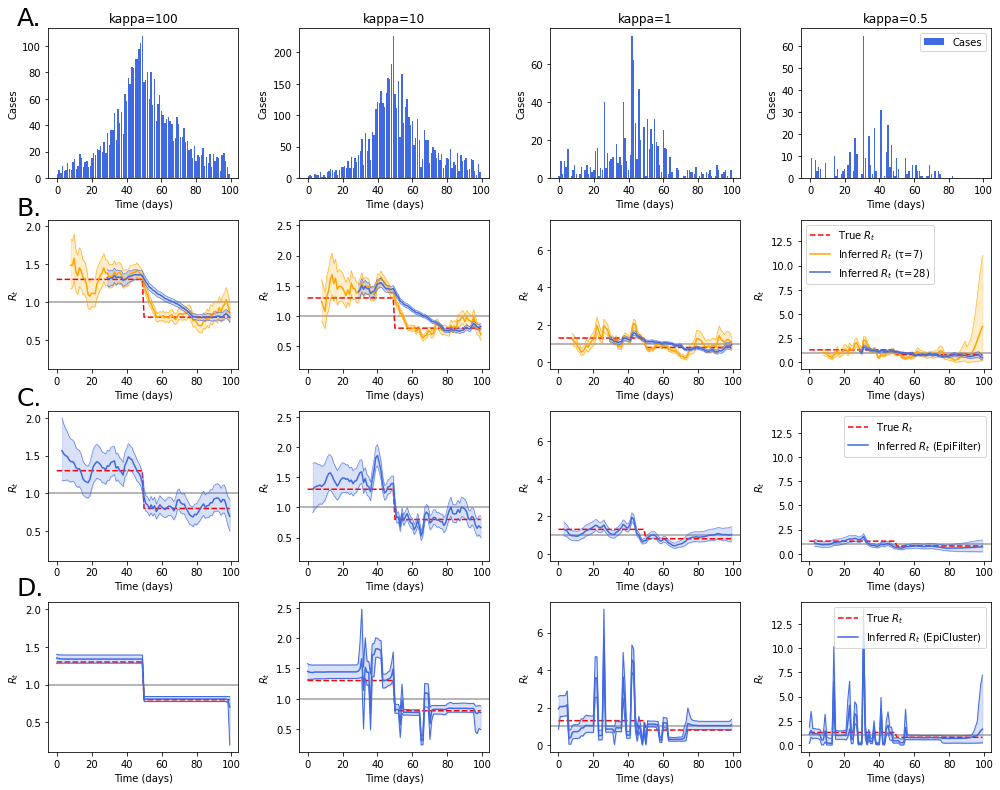

In [5]:
fig = plt.figure(figsize=(14,11))

num_exps = 4

for i in range(num_exps):
    
    do_legend = i==num_exps-1

    cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = all_results[i]
    title = 'kappa={}'.format(kappas[i])

        
    ax = fig.add_subplot(4, num_exps, 1+i)

    x = np.arange(len(cases))
    ax.bar(x, cases, label='Cases', color='royalblue')
    ax.set_title(title)

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//2:], z_chain[num_mcmc//2:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax)
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')

    x = np.arange(8, len(cases))
    ax.plot(x, intervals7['Mean'][len(w):], color='orange', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'][len(w):], intervals7['Upper bound CI'][len(w):], alpha=0.2, color='orange')
    ax.plot(x, intervals7['Lower bound CI'][len(w):], color='orange', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'][len(w):], color='orange', lw=0.5)
    
    x = np.arange(29, len(cases))
    ax.plot(x, intervals28['Mean'][len(w):], color='royalblue', label='Inferred $R_t$ (τ=28)')
    ax.fill_between(x, intervals28['Lower bound CI'][len(w):], intervals28['Upper bound CI'][len(w):], alpha=0.2, color='royalblue')
    ax.plot(x, intervals28['Lower bound CI'][len(w):], color='royalblue', lw=0.5)
    ax.plot(x, intervals28['Upper bound CI'][len(w):], color='royalblue', lw=0.5)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    
    
    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax)
    
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')


    x = epi_results['day'][1:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.02, .97, 'A.', fontsize=25)
fig.text(.02, .73, 'B.', fontsize=25)
fig.text(.02, .49, 'C.', fontsize=25)
fig.text(.02, .25, 'D.', fontsize=25)

plt.savefig('../notebooks/FigureS5.pdf')
plt.show()
